# importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [19]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\EDX\\Edx.csv')
data.head(5)

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                720 non-null    object
 1   University          720 non-null    object
 2   Difficulty Level    720 non-null    object
 3   Link                720 non-null    object
 4   About               720 non-null    object
 5   Course Description  720 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [21]:
data.describe().T

,count,unique,top,freq
Name,720,717,Introduction to Marketing,2
University,720,102,Harvard University,91
Difficulty Level,720,3,Beginner,437
Link,720,719,https://www.edx.org/course/introduction-to-pro...,2
About,720,698,This course is part of a MicroMasters® Program,15
Course Description,720,717,"About the Database Series of Courses""Databases...",3


In [22]:
data.shape

(720, 6)

In [23]:
#checking for duplicates
data.duplicated().sum()

1

In [24]:
#dropping the duplicate
data.drop_duplicates(inplace = True)

In [25]:
data.reset_index(drop = True, inplace = True)

In [26]:
#drop the link column
data.drop(columns=['Link'], axis=0 ,inplace = True)
data.tail(2)

,Name,University,Difficulty Level,About,Course Description
717,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."
718,MathTrackX: Special Functions,University of Adelaide,Beginner,"Understand trigonometric, exponential and loga...",This course is part two of the MathTrackX XSer...


# Preprocessing of  data

In [27]:
data.isnull().sum()

Name                  0
University            0
Difficulty Level      0
About                 0
Course Description    0
dtype: int64

# Exploratory Data Analysis

In [28]:
print(f"Beginner Level\t\t {data['Difficulty Level'].value_counts().values[0]}\nIntermediate Level\t {data['Difficulty Level'].value_counts().values[1]}\nAdvanced Level\t\t {data['Difficulty Level'].value_counts().values[2]}")

Beginner Level		 437
Intermediate Level	 204
Advanced Level		 78


Text(0.5, 1.0, 'Difficulty Level')

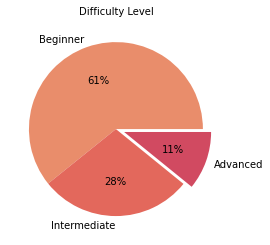

In [29]:
#Percentage of passengers that survived and not survived
plt.figure(figsize = (6,4))
label = data['Difficulty Level'].value_counts().index
palette = sns.color_palette('flare')
explode = [0, 0, 0.1]
plt.pie(x = data['Difficulty Level'].value_counts().values, labels = label, colors = palette, explode = explode, autopct = '%.0f%%')
plt.title('Difficulty Level', fontsize = 10)

In [30]:
#The university or industry partners with highest number of courses
print(f"{data.University.value_counts().index[0]} is the university with highest number of courses - {data.University.value_counts().values[0]} courses.") 

Harvard University is the university with highest number of courses - 90 courses.


In [31]:
top_5 = data.University.value_counts()[ : 5].index
top_5

Index(['Harvard University', 'Massachusetts Institute of Technology',
       'Delft University of Technology', 'The University of Queensland',
       'IBM'],
      dtype='object')

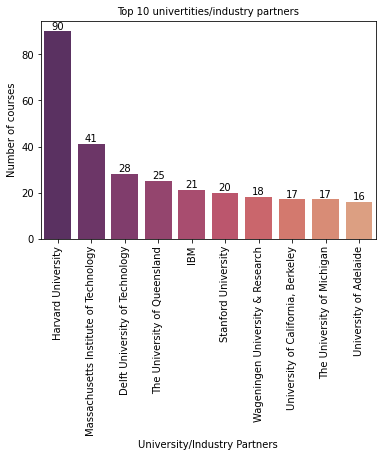

In [32]:
ax = sns.barplot(x = data.University.value_counts()[ : 10].index, y = data.University.value_counts()[ : 10].values, palette = 'flare_r')
plt.title('Top 10 univertities/industry partners', fontsize = 10)
plt.xlabel('University/Industry Partners')
plt.ylabel('Number of courses')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

In [33]:
top5 = ['Harvard University', 'Massachusetts Institute of Technology',
       'Delft University of Technology', 'The University of Queensland',
       'IBM']
top5_University = data[data.University.isin(top5)]

In [34]:
top5_University.University

2                         Harvard University
3      Massachusetts Institute of Technology
6               The University of Queensland
10                        Harvard University
12              The University of Queensland
                       ...                  
696    Massachusetts Institute of Technology
700             The University of Queensland
702                       Harvard University
709                                      IBM
714                       Harvard University
Name: University, Length: 205, dtype: object

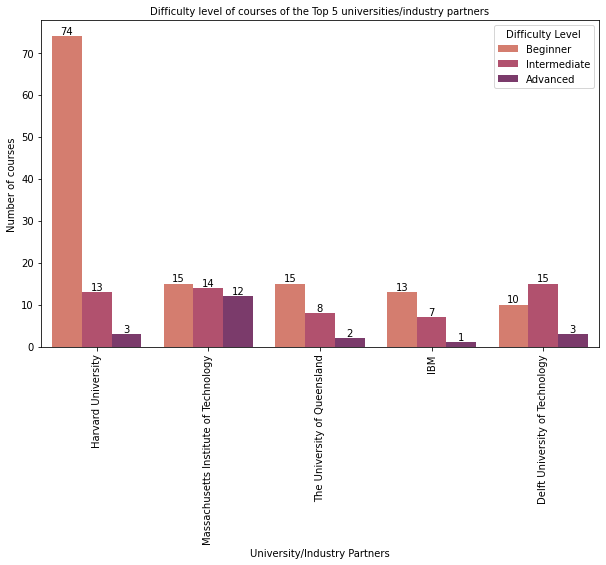

In [35]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = top5_University.University, hue = top5_University['Difficulty Level'], palette = 'flare')
plt.xticks(rotation = 90)
plt.title('Difficulty level of courses of the Top 5 universities/industry partners', fontsize = 10)
plt.xlabel('University/Industry Partners')
plt.ylabel('Number of courses')
for i in ax.containers:
    ax.bar_label(i,)

In [36]:
data.drop(columns = ["University", "Difficulty Level"], axis =1, inplace = True)
df = data.copy()
data['Description'] = data['Name'] + ' ' + data['About'] + ' ' + data['Course Description']
data.head(5)

,Name,About,Course Description,Description
0,How to Learn Online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t...",How to Learn Online Learn essential strategies...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...,Programming for Everybody (Getting Started wit...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct...",CS50's Introduction to Computer Science An int...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab...",The Analytics Edge Through inspiring examples ...
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...,Marketing Analytics: Marketing Measurement Str...


In [40]:
#importing the dependencies needed for pre processing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [47]:
lemma = WordNetLemmatizer()

In [48]:
#define a function for preprocessing
def clean(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text) #removes punctuation marks
    text = text.lower() #changes to lower case
    tokens = word_tokenize(text) #tokenize the text
    clean_list = [] 
    for token in tokens:
        if token not in en_stopwords: #removes stopwords
            clean_list.append(lemma.lemmatize(token)) #lemmatizing and appends to clean_list
    return " ".join(clean_list)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer()

In [54]:
test_matrix = vectorizer.fit_transform(data['Description'])

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
def Recommendation_Cosine_similarity(matrix, row_num):
    similarity = cosine_similarity(test_matrix)
    similar_courses = list(enumerate(similarity[row_num]))
    sorted_similar_courses = sorted(similar_courses, key=lambda x:x[1], reverse= True)[:6]#the first element is the course being viewed
#This part will return the description of the recommended courses
    i = 0
    for item in sorted_similar_courses:
        course_description = data[data.index == item[0]]["Name"].values[0]
        recommendations = print(f"{i+1}\t{course_description}\n")
        i = i + 1
    return recommendations

In [57]:
Recommendation_Cosine_similarity(test_matrix, 3)

1	The Analytics Edge

2	Introduction to Data Analytics for Managers

3	Data for Effective Policy Making

4	Analytics for Decision Making

5	The Power of Data

6	Statistics and R

